# PCA - Principal Component Analysis

The sample dataset we will use in this project is the "Iris" dataset, which is one of the most popular datasets in the field of artificial learning. The Iris dataset consists of three Iris plant species (Iris setosa, Iris virginica, and Iris versicolor), with a total of 150 examples, each species having 50 examples. Four features are defined for each example: sepal length, sepal width, petal length, and petal width.

In the dataset, each plant example represents a separate observation, where the plant species name is the dependent variable, and the measured four basic features of the plants are the independent variables.


In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "pca_iris.data"
# We load our dataset into a Pandas DataFrame.
df = pd.read_csv(url , names=['sepal length','sepal width','petal length','petal width','target'])

df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Let's separate the features as 'X':

x = df[features]

# Let's separate the target as 'y':
y = df[['target']]

We need to scale the values because each feature has significantly different scales, and it is necessary for artificial intelligence to balance these with equal weights. For this purpose, we use the Standard Scaler to transform all the data so that the mean becomes 0 and the variance becomes 1.

In [9]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
#Let's see if it has been scaled or not?
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# PCA Projection: Convert from 4 dimensions to 2 dimensions

Our original data has 4 dimensions: 'sepal length', 'sepal width', 'petal length', 'petal width'.

By performing PCA, we will reduce them to 2 dimensions. However, it should be noted that the resulting 2 dimensions from the PCA reduction will have arbitrary labels that do not carry any specific meaning. In other words, it is not a simple elimination of 2 features out of 4, but rather a transformation with new labels.

In [12]:
pca  = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])

In [13]:
principalDf

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


Now, let's append our target column to the end of the PCA DataFrame


In [15]:
final_dataframe = pd.concat([principalDf , df[['target']]] , axis = 1 )

In [16]:
final_dataframe.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Finally, let's visualize our final DataFrame. Let's create a simple plot.

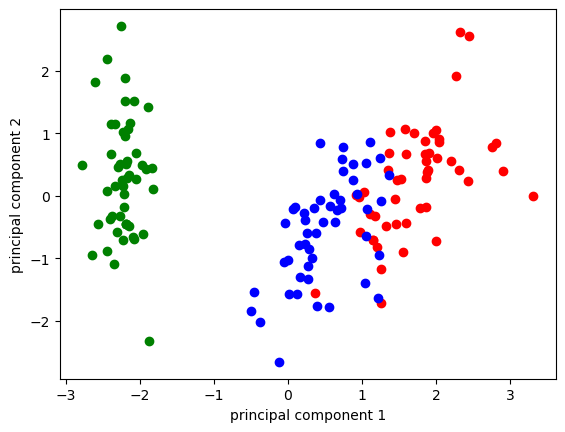

In [17]:
dfsetosa= final_dataframe[df.target=='Iris-setosa']
dfvirginica = final_dataframe[df.target=='Iris-virginica']
dfversicolor = final_dataframe[df.target=='Iris-versicolor']
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

plt.scatter(dfsetosa['principal component 1'], dfsetosa['principal component 2'],color='green')
plt.scatter(dfvirginica['principal component 1'], dfvirginica['principal component 2'],color='red')
plt.scatter(dfversicolor['principal component 1'], dfversicolor['principal component 2'],color='blue')


Let's create a more professional plot for visualization.

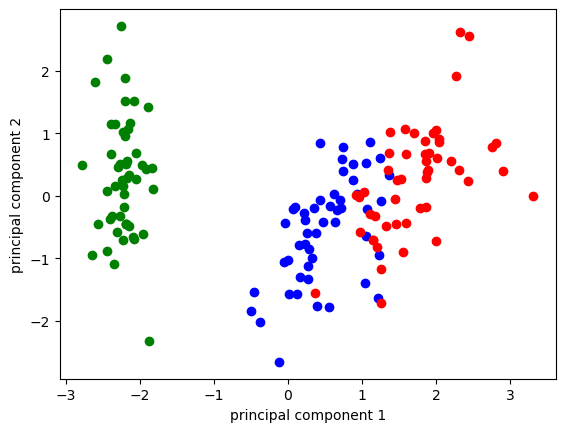

In [18]:
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['g', 'b', 'r']

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

for target, col in zip(targets,colors):
    dftemp = final_dataframe[df.target==target]
    plt.scatter(dftemp['principal component 1'], dftemp['principal component 2'], color=col)

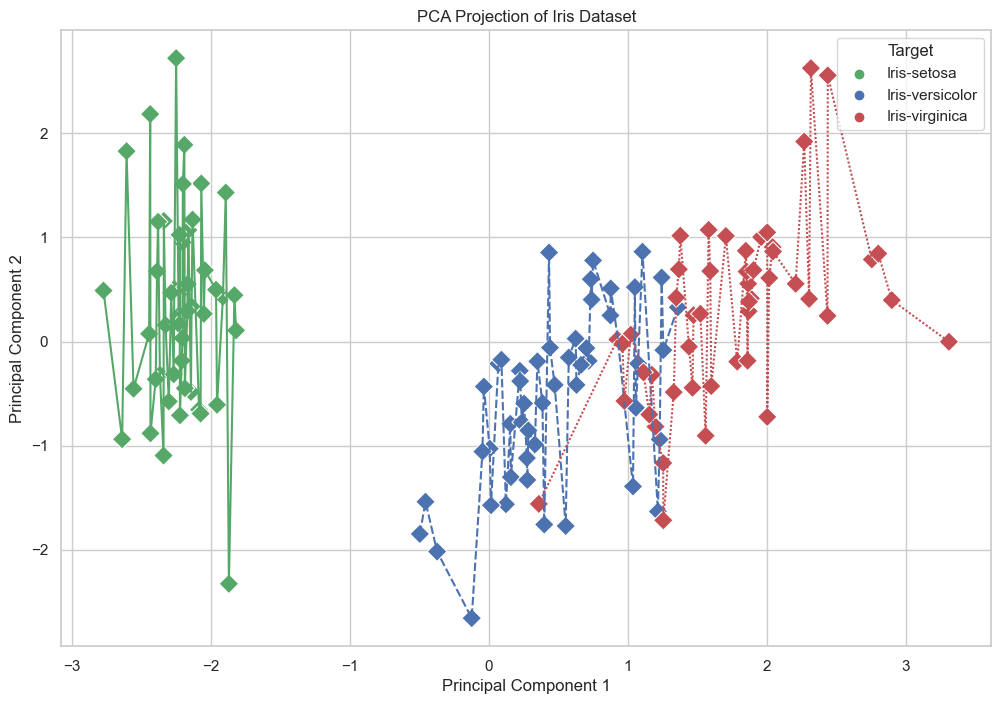

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a more unique visualization
sns.set(style="whitegrid")

# Create a scatterplot with a different marker for each target
plt.figure(figsize=(12, 8))

# Scatter plot with markers
sns.scatterplot(
    x='principal component 1',
    y='principal component 2',
    hue='target',
    palette=['g', 'b', 'r'],
    marker='D',  # Diamond-shaped markers
    s=100,       # Marker size
    data=final_dataframe
)

# Line plot connecting points for each target
sns.lineplot(
    x='principal component 1',
    y='principal component 2',
    hue='target',
    palette=['g', 'b', 'r'],
    style='target',
    markers=None,
    data=final_dataframe,
    legend=False
)

# Add legend
plt.legend(title='Target', loc='upper right')

# Set plot labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set plot title
plt.title('PCA Projection of Iris Dataset')

# Show the plot
plt.show()


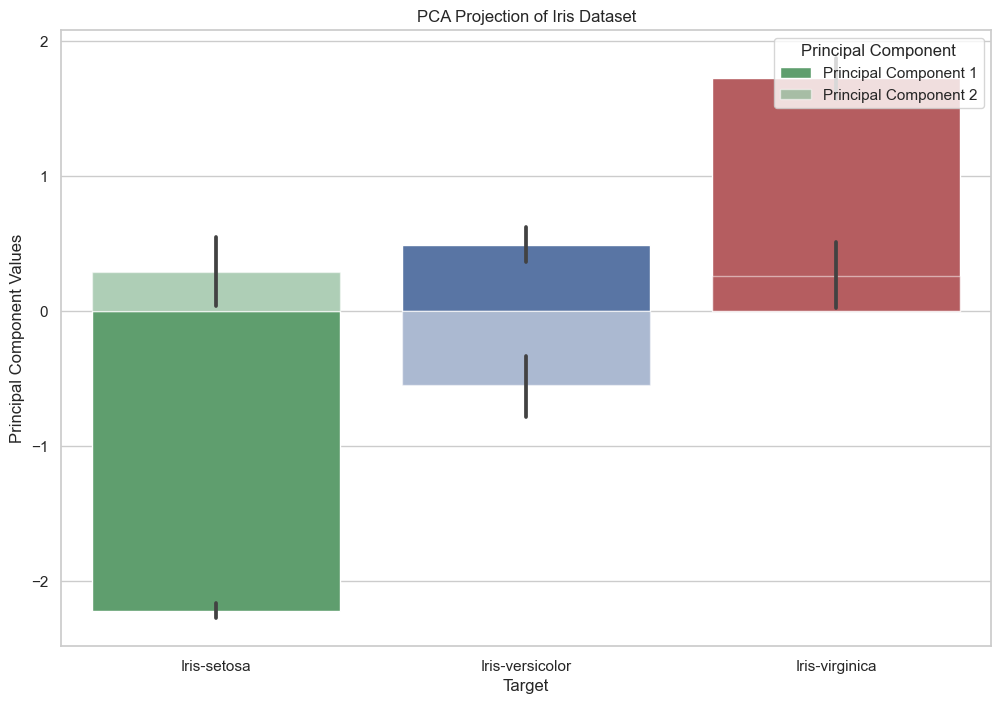

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a more unique visualization
sns.set(style="whitegrid")

# Create a bar plot with different colors for each target
plt.figure(figsize=(12, 8))

# Bar plot for Principal Component 1
sns.barplot(
    x='target',
    y='principal component 1',
    palette=['g', 'b', 'r'],
    data=final_dataframe,
    label='Principal Component 1'
)

# Bar plot for Principal Component 2
sns.barplot(
    x='target',
    y='principal component 2',
    palette=['g', 'b', 'r'],
    data=final_dataframe,
    alpha=0.5,  # Add transparency for overlapping bars
    label='Principal Component 2'
)

# Get the current axes
ax = plt.gca()

# Add legend
ax.legend(title='Principal Component', loc='upper right')

# Set plot labels
plt.xlabel('Target')
plt.ylabel('Principal Component Values')

# Set plot title
plt.title('PCA Projection of Iris Dataset')

# Show the plot
plt.show()


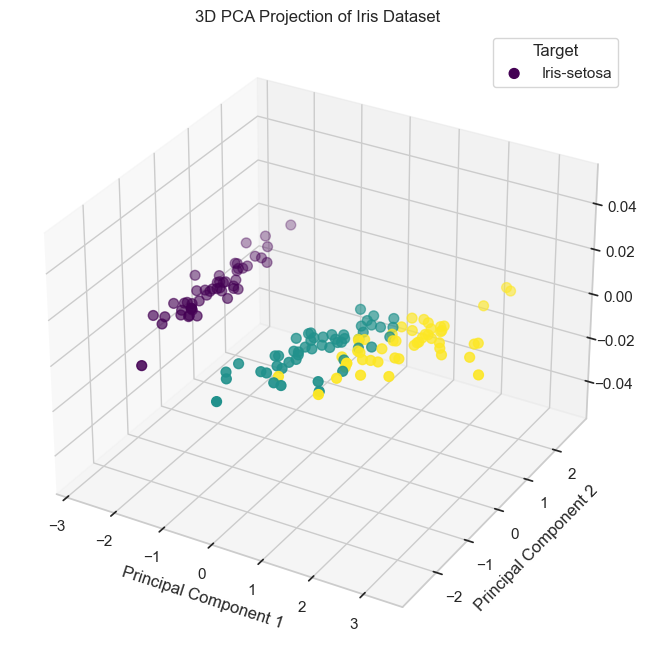

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set the style for a more unique visualization
sns.set(style="whitegrid")

# Create a 3D scatter plot with different colors for each target
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for Principal Components 1 and 2
scatter = ax.scatter(
    final_dataframe['principal component 1'],
    final_dataframe['principal component 2'],
    c=final_dataframe['target'].astype('category').cat.codes,
    cmap='viridis',  # Choose a colormap
    s=50,  # Marker size
    marker='o'  # Marker style
)

# Set legend
legend_labels = final_dataframe['target'].unique()
legend = ax.legend(legend_labels, title='Target', loc='upper right')

# Adjust legend marker sizes
for handle in legend.legendHandles:
    handle._sizes = [50]

# Set plot labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('')  # No need for Principal Component 3 in this case

# Set plot title
ax.set_title('3D PCA Projection of Iris Dataset')

# Show the plot
plt.show()


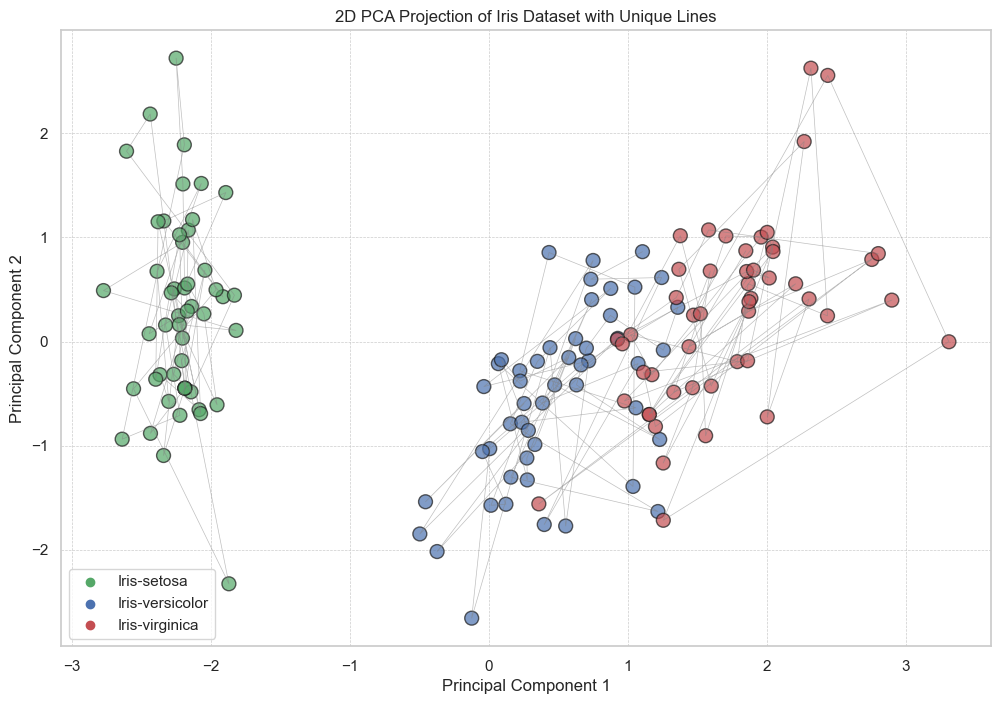

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a more unique visualization
sns.set(style="whitegrid")

# Create a scatter plot with different colors for each target
plt.figure(figsize=(12, 8))

# Scatter plot for Principal Components 1 and 2
scatter = sns.scatterplot(
    x=final_dataframe['principal component 1'],
    y=final_dataframe['principal component 2'],
    hue=final_dataframe['target'],
    palette=['g', 'b', 'r'],
    s=100,  # Marker size
    edgecolor='k',  # Edge color for markers
    linewidth=1,  # Edge linewidth
    alpha=0.7  # Transparency
)

# Draw connecting lines between points within each target
for target in final_dataframe['target'].unique():
    subset = final_dataframe[final_dataframe['target'] == target]
    plt.plot(subset['principal component 1'], subset['principal component 2'],
             color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# Set legend
legend_labels = final_dataframe['target'].unique()
plt.legend(title='Target', labels=legend_labels, loc='upper right')

# Set plot labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set plot title
plt.title('2D PCA Projection of Iris Dataset with Unique Lines')

# Customize legend
legend = plt.legend()
legend.get_title().set_fontsize('12')

# Customize grid
plt.grid(linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


In [39]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [40]:
pca.explained_variance_ratio_.sum()

0.9580097536148199